<a href="https://colab.research.google.com/github/johnsk95/CS4641/blob/master/Project3/breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.plotly as py
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive'

 breast-cancer
'Colab Notebooks'
'Deep Learning'
 heart-disease-uci
'Integrated approach to architecture and operating systems'
'Machine Learning'
 mice_protein_expression
 Quant
'scientific computing'
'Stock Team.gslides'
 tokyo
 vip


In [0]:
data = pd.read_csv('/content/drive/My Drive/breast-cancer/breast_cancer.csv')

In [0]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data = data.drop(columns='id')

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data = data.drop(["Unnamed: 32"], axis=1)

In [0]:
# Split data into X and y
x = data.drop(["diagnosis"] , axis=1)
y = data["diagnosis"].values
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [0]:
pca = PCA(2)
projected = pca.fit_transform(x)

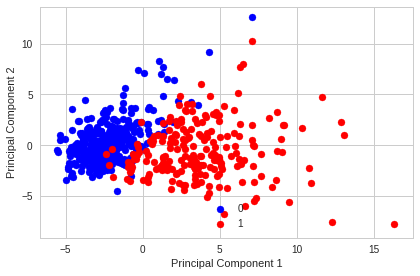

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, color in zip((0, 1), ('blue', 'red')):
        plt.scatter(projected[y==lab, 0],
                    projected[y==lab, 1],
                    label=lab,
                    c=color)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

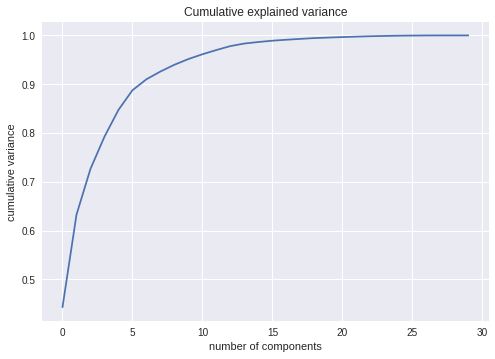

In [0]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative variance');
# The curve quantifies how much of the total, 12-dimensional variance is contained within the first N components. Here we can see that we need at least 9 components retain 90% of variance. 

In [0]:
pca = PCA().fit(x)
print(pca.explained_variance_)

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


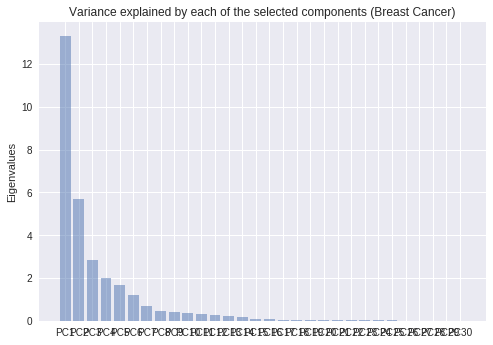

In [0]:
objects = []
for i in range(len(pca.explained_variance_)):
  objects.append("PC" + str(i+1))
y_pos = np.arange(len(objects))
performance = pca.explained_variance_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Eigenvalues')
plt.title('Variance explained by each of the selected components (Breast Cancer)')
 
plt.show()

In [0]:
from sklearn.decomposition import FastICA
from mpl_toolkits.mplot3d import Axes3D

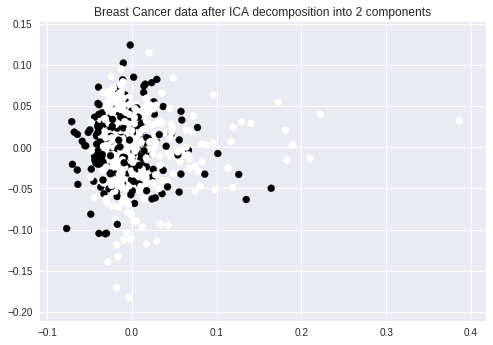

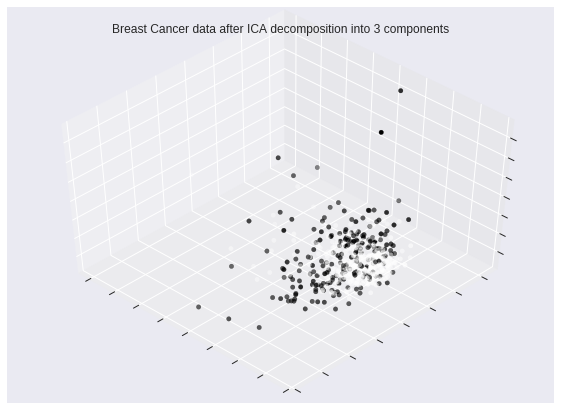

In [0]:
ica = FastICA(n_components = 6)
X_transformed = ica.fit_transform(x)
plt.figure()
plt.title('Breast Cancer data after ICA decomposition into 2 components')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()

ica = FastICA(n_components=3)
X_transformed = ica.fit_transform(x)
    
# Visualize transformed data
plt.figure()
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()
plt.title('Breast Cancer data after ICA decomposition into 3 components')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



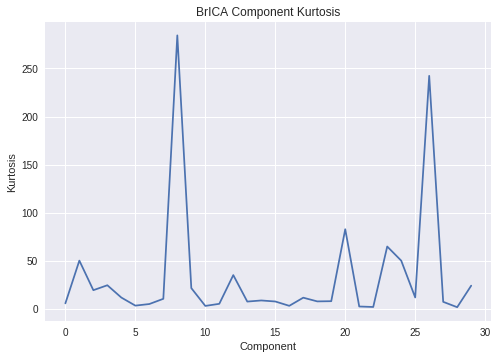

In [0]:
from scipy.stats import kurtosis
ica = FastICA(n_components=x.shape[1], algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
X_r = ica.fit(x).transform(x)

kurt = kurtosis(X_r)

plt.figure()
plt.plot(np.arange(kurt.shape[0]), kurt)
plt.xlabel('Component')
plt.ylabel('Kurtosis')
plt.title('BrICA Component Kurtosis')
plt.show()

In [0]:
from scipy.stats import kurtosis, kurtosistest
from sklearn.decomposition import FastICA
data = pd.read_csv('/content/drive/My Drive/breast-cancer/breast_cancer.csv')

# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

breast_y = np.array(data.diagnosis.tolist())
data = data.drop('diagnosis', 1)
breast_x = np.array(data.as_matrix())

ica = FastICA(max_iter = 10000)
kurt = []
loss = []
x = StandardScaler().fit_transform(breast_x)
for dim in range(1, breast_x.shape[1]):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(x)
    kurt.append(kurtosistest(tmp).statistic.mean())
    proj = ica.inverse_transform(tmp)
    loss.append(((x - proj)**2).mean())

res = pd.DataFrame({"kurtosis": kurt, "loss": loss})

#display(res)
print(kurt)

[3.3044310990384034, 6.376612768906602, 7.48797035216758, 5.760885077778784, 6.356672635515071, 6.683062259689315, 7.547049887747437, 7.497968667542895, 8.289966755288773, 9.017224367823333, 8.318721744630595, 8.86134731852601, 9.363247365411677, 8.674128702472066, 9.312261091999249, 9.744708120830921, 9.985749170638888, 9.796414143458039, 9.700782878344512, 9.682038750675321, 10.019031796996874, 10.284092524992666, 9.872811411538324, 10.023008833414451, 10.343691540763016, 10.25748706496626, 10.483368710801402, 10.593496752963485, 10.328500890853755]


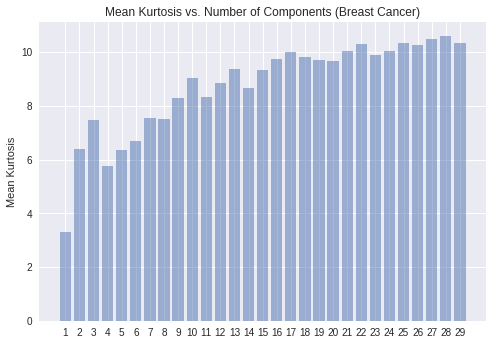

In [0]:
objects = []
for i in range(len(kurt)):
  objects.append(str(i+1))

y_pos = np.arange(len(kurt))
performance = pca.explained_variance_
 
plt.bar(y_pos, kurt, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Kurtosis')
plt.title('Mean Kurtosis vs. Number of Components (Breast Cancer)')
 
plt.show()

In [0]:
def run_kmeans(X,y,title):

    kclusters = list(np.arange(2,50,2))
    sil_scores = []; f1_scores = []; homo_scores = []; train_times = []

    for k in kclusters:
        start_time = timeit.default_timer()
        km = KMeans(n_clusters=k, n_init=10,random_state=100,n_jobs=-1).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)
        sil_scores.append(sil_score(X, km.labels_))
        y_mode_vote = cluster_predictions(y,km.labels_)
        f1_scores.append(f1_score(y, y_mode_vote))
        homo_scores.append(homogeneity_score(y, km.labels_))
    
    # plot f1 scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, f1_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores KMeans: '+ title)
    plt.show()

    # plot model training time
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, train_times)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Training Time (s)')
    plt.title('KMeans Training Time: '+ title)
    plt.show()